In [1]:
import numpy as np 
import pandas as pd 
import os
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset-oxford/labels_oxford.npy
/kaggle/input/dataset-oxford/__results__.html
/kaggle/input/dataset-oxford/__notebook__.ipynb
/kaggle/input/dataset-oxford/images_oxford.npy
/kaggle/input/dataset-oxford/__output__.json
/kaggle/input/dataset-oxford/custom.css
/kaggle/input/dataset-oxford/__results___files/__results___11_8.png
/kaggle/input/dataset-oxford/__results___files/__results___11_7.png
/kaggle/input/dataset-oxford/__results___files/__results___11_0.png
/kaggle/input/dataset-oxford/__results___files/__results___11_5.png
/kaggle/input/dataset-oxford/__results___files/__results___11_3.png
/kaggle/input/dataset-oxford/__results___files/__results___11_4.png
/kaggle/input/dataset-oxford/__results___files/__results___11_2.png
/kaggle/input/dataset-oxford/__results___files/__results___11_9.png
/kaggle/input/dataset-oxford/__results___files/__results___11_6.png
/kaggle/input/dataset-oxford/__results___files/__results___11_1.png


In [2]:
import os
os.chdir("/kaggle/input/dataset-oxford")
os.listdir() 

['labels_oxford.npy',
 '__results__.html',
 '__notebook__.ipynb',
 '__results___files',
 'images_oxford.npy',
 '__output__.json',
 'custom.css']

In [3]:
images = np.load('/kaggle/input/dataset-oxford/images_oxford.npy')
labels = np.load('/kaggle/input/dataset-oxford/labels_oxford.npy',allow_pickle = True)

In [4]:
len(labels)

14779

In [5]:
breeds = Counter(labels)
breeds

Counter({'american_pit_bull_terrier': 400,
         'leonberger': 400,
         'english_cocker_spaniel': 400,
         'Siamese': 400,
         'saint_bernard': 400,
         'american_bulldog': 400,
         'Sphynx': 400,
         'Egyptian_Mau': 400,
         'Birman': 400,
         'english_setter': 400,
         'newfoundland': 400,
         'pug': 400,
         'yorkshire_terrier': 400,
         'Abyssinian': 400,
         'havanese': 400,
         'miniature_pinscher': 400,
         'chihuahua': 400,
         'basset_hound': 400,
         'Bombay': 400,
         'British_Shorthair': 400,
         'Maine_Coon': 400,
         'Bengal': 400,
         'japanese_chin': 400,
         'shiba_inu': 400,
         'wheaten_terrier': 400,
         'beagle': 400,
         'Persian': 400,
         'great_pyrenees': 400,
         'pomeranian': 400,
         'samoyed': 400,
         'german_shorthaired': 400,
         'Ragdoll': 400,
         'keeshond': 400,
         'Russian_Blue': 400,
   

In [6]:
images.shape

(14779, 224, 224, 3)

In [7]:
labels.shape

(14779,)

In [8]:
breeds_use = ['Sphynx','Siamese','Maine_Coon','chihuahua','saint_bernard','scottish_terrier']

In [9]:
selected_breeds = [breed for breed in breeds_use]  # Select top 10 breeds
selected_indices = [i for i, label in enumerate(labels) if label in selected_breeds]  # Get indices of selected breeds

images = images[selected_indices]

In [10]:
labels = labels[selected_indices]

num_classes = len(selected_breeds)

In [11]:
images.shape, num_classes

((2398, 224, 224, 3), 6)

# KMeans Clustering - 6 Breeds

Silhouette Score: 0.09110458753053381


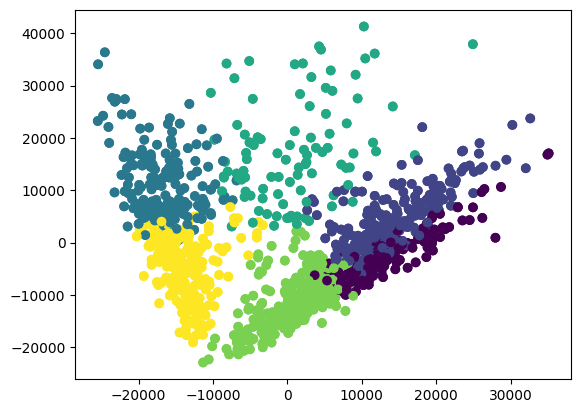

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Flattening the images
images_flattened = images.reshape(images.shape[0], -1)

# Use PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=42)
images_pca = pca.fit_transform(images_flattened)

# Using KMeans to cluster the images
kmeans = KMeans(n_clusters=num_classes, random_state=42)
clusters = kmeans.fit_predict(images_pca)

# Calculating silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(images_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualizing the clusters
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

# Plotting Clusters - 6

Cluster 0:


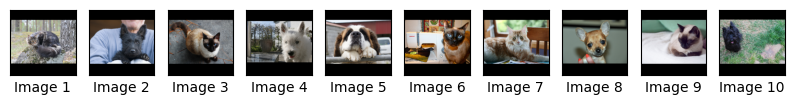

Cluster 1:


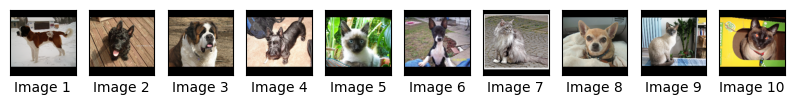

Cluster 2:


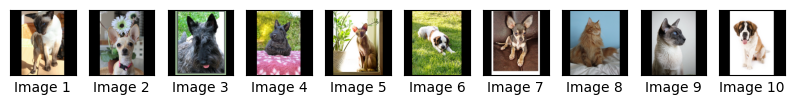

Cluster 3:


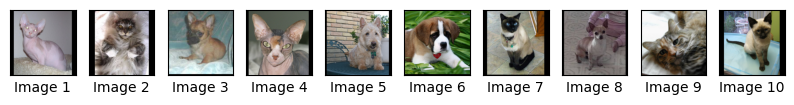

Cluster 4:


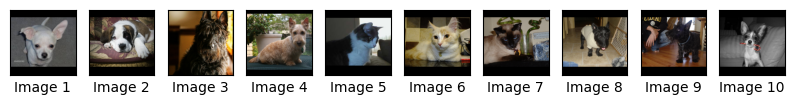

Cluster 5:


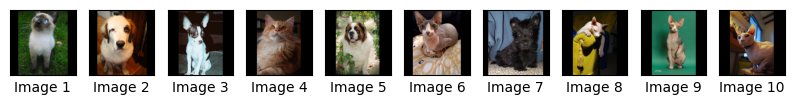

In [13]:
import matplotlib.image as mpimg

# Create a dictionary to store the images for each cluster
clustered_images = {i: [] for i in range(num_classes)}

# Assign each image to its cluster
for i, cluster in enumerate(clusters):
    clustered_images[cluster].append(images[i])

# Plot the images for each cluster
for cluster in clustered_images:
    print(f"Cluster {cluster}:")
    
    # Create a new figure for the cluster
    plt.figure(figsize=(10, 10))
    
    # Plot the first 10 images of the cluster
    for i in range(min(10, len(clustered_images[cluster]))):
        plt.subplot(1, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(clustered_images[cluster][i], cmap=plt.cm.binary)
        plt.xlabel(f"Image {i+1}")
    
    # Show the plot
    plt.show()

Silhouette Score: 0.286976055472545


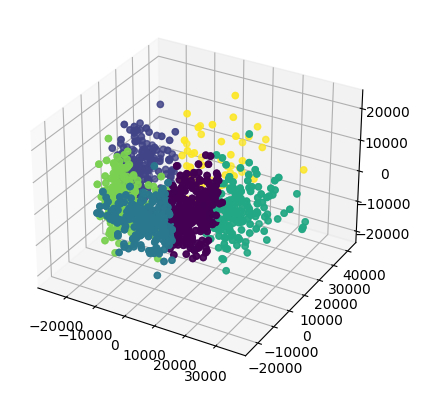

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Flattening the images
images_flattened = images.reshape(images.shape[0], -1)

# Use PCA to reduce dimensionality
pca = PCA(n_components=3, random_state=42)  
images_pca = pca.fit_transform(images_flattened)

# Using KMeans to cluster the images
kmeans = KMeans(n_clusters=num_classes, random_state=42)
clusters = kmeans.fit_predict(images_pca)

# Calculating silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(images_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(images_pca[:, 0], images_pca[:, 1], images_pca[:, 2], c=clusters, cmap='viridis')
plt.show()


In [15]:
import plotly.express as px
import pandas as pd

# Assuming images_pca is a numpy array and clusters is your labels
df = pd.DataFrame(images_pca, columns=['PC1', 'PC2', 'PC3'])
df['cluster'] = clusters

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='cluster')
fig.show()


# KMeans Clustering - 2 Clusters

Silhouette Score: 0.17433983124214325


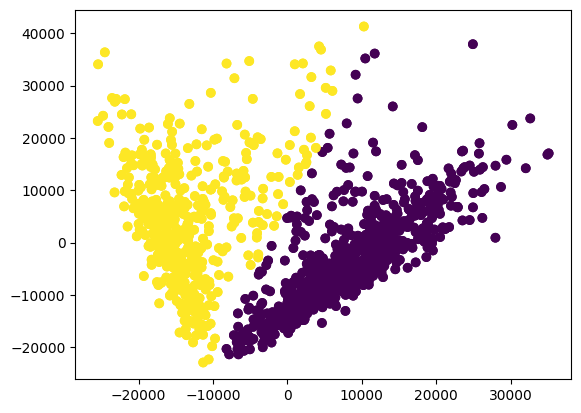

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Flatten the images
images_flattened = images.reshape(images.shape[0], -1)

# Use PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=42)
images_pca = pca.fit_transform(images_flattened)

# Use KMeans to cluster the images
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(images_pca)

# Calculate silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(images_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

# Plotting Clusters - 6

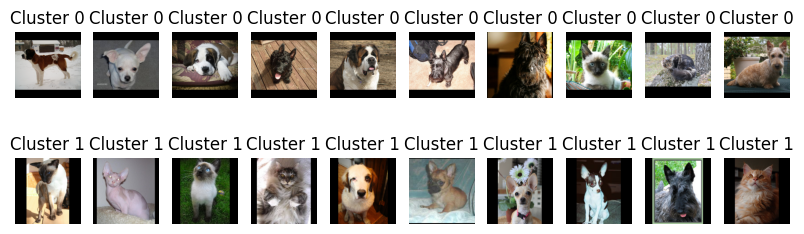

In [17]:
import matplotlib.pyplot as plt

# Create a figure to display the images
fig = plt.figure(figsize=(10, 3))

# For each cluster
for cluster in np.unique(clusters):
    # Get the indices of the images belonging to this cluster
    indices = np.where(clusters == cluster)[0]
    # Select only the top 10 images
    indices = indices[:10]
    
    # For each index
    for i, index in enumerate(indices):
        # Create a subplot for each image
        ax = fig.add_subplot(len(np.unique(clusters)), 10, cluster * 10 + i + 1)
        # Display the image
        ax.imshow(images[index])
        # Set the title of the subplot to the cluster number
        ax.title.set_text(f"Cluster {cluster}")
        # Remove the axis
        plt.axis('off')

# Show the plot
plt.show()



Silhouette Score: 0.3871081289966568


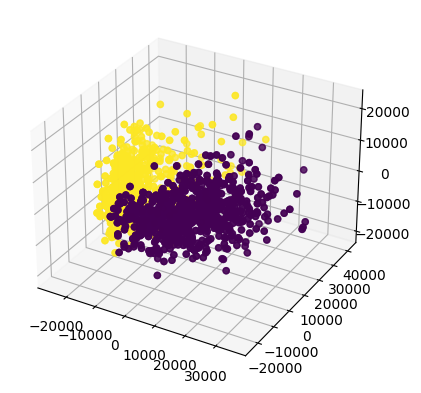

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Flattening the images
images_flattened = images.reshape(images.shape[0], -1)

# Use PCA to reduce dimensionality
pca = PCA(n_components=3, random_state=42) 
images_pca = pca.fit_transform(images_flattened)

# Using KMeans to cluster the images
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(images_pca)

# Calculating silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(images_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualizing the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(images_pca[:, 0], images_pca[:, 1], images_pca[:, 2], c=clusters, cmap='viridis')
plt.show()


In [19]:
import plotly.express as px
import pandas as pd

# Assuming images_pca is a numpy array and clusters is your labels
df = pd.DataFrame(images_pca, columns=['PC1', 'PC2', 'PC3'])
df['cluster'] = clusters

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='cluster')
fig.show()